# Multiple Linear Regression

## Importing the libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [5]:
dataset = pd.read_csv('50_Startups.csv')

In [6]:
dataset[:8]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


## Feature Engineering

In [10]:
data = pd.get_dummies(dataset, columns=['State'], drop_first=True)

In [11]:
X = data.drop('Profit', axis=1)
y = data['Profit']

## Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 83502864.03257766
R-squared: 0.9347068473282423
Koefisien: [ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]
Intercept: 42554.16761773238


In [26]:
def plot_regression(x, y, y_pred, x_label, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, marker='o', label='Yang semestinya', color='magenta') # Changed marker style to 'o'
    sns.scatterplot(x=x, y=y_pred, label='Prediksi', color='yellow')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

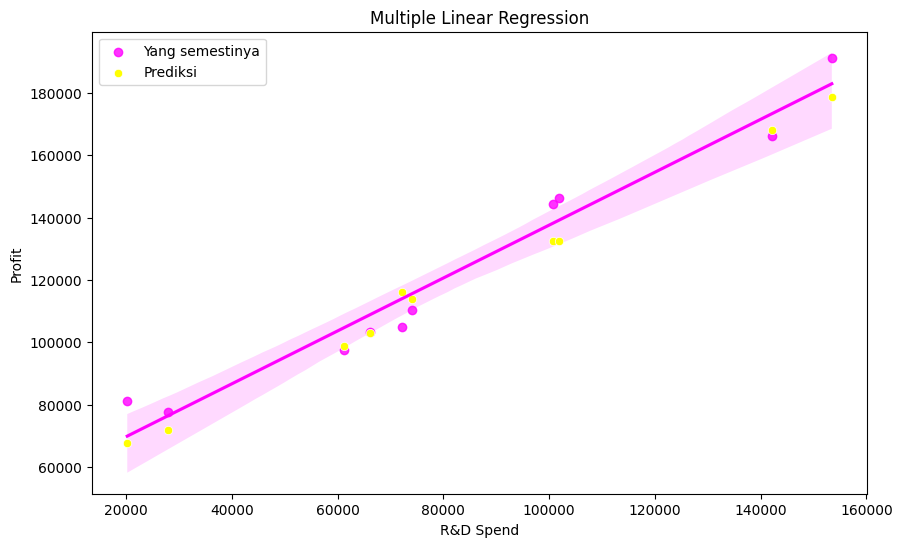

In [27]:
plot_regression(X_test['R&D Spend'], y_test, y_pred, 'R&D Spend', 'Multiple Linear Regression')


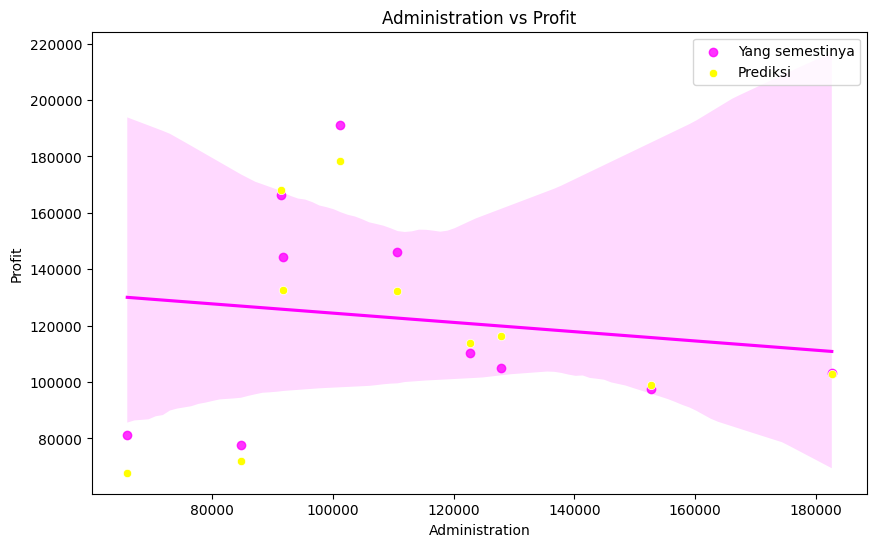

In [31]:
plot_regression(X_test['Administration'], y_test, y_pred, 'Administration', 'Administration vs Profit')

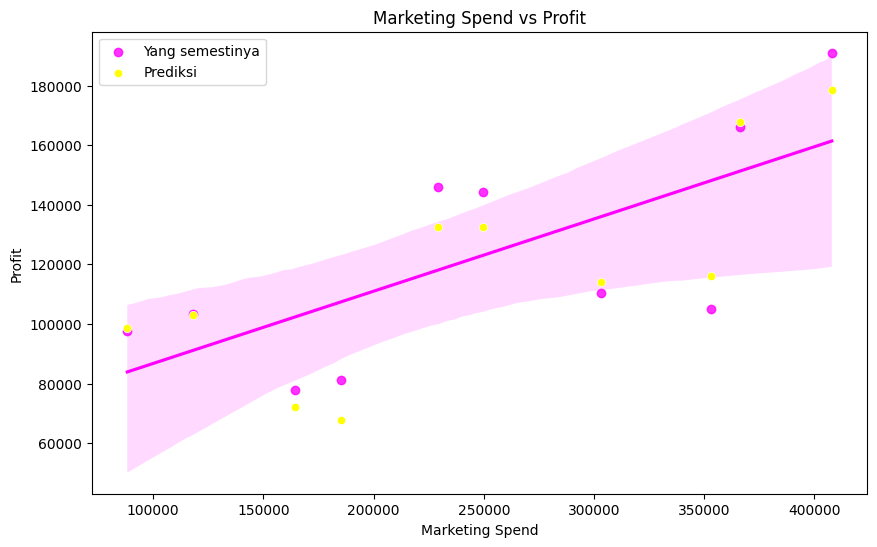

In [32]:
plot_regression(X_test['Marketing Spend'], y_test, y_pred, 'Marketing Spend', 'Marketing Spend vs Profit')